In [264]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# np.random.seed(1)

### Define some functions

In [319]:
# Linear regression y = X*w
# def predict(X,w):
#     return np.dot(X,w)

In [320]:
# Mean square error
def cost_func(X,y,w):
    n=len(X)
    prediction=np.dot(X,w)
    sum_err = (y - prediction)**2 # e = (1/n) * (y-prediction)^2 = (1/2n)*(y - X.T @ w)^2
    return np.sum(sum_err)/(2*n)

In [344]:
# Gradient descent
def update_w(X,y,w,lr):
    n=len(X)
    prediction=np.dot(X,w)
    grad = -X.T @ (y-prediction) # grad's shape is the same of w
    #b += -2*(y[i]-(X[i]*w+b))
    grad = grad/n*lr
    w = w - grad # w = w - *dJ/dw
    return w

In [333]:
# Training 
def training(X,y,w,lr,num_iter):
    cost_history=[]
    for i in range(num_iter):
        w=update_w(X,y,w,lr)
        cost=cost_func(X,y,w)
        cost_history.append(cost)
        
    return w, cost_history 

In [334]:
# Feature normalize: 
def Normalize(X):
    n = np.copy(X)
    n[0,0] = 100
    # std deviation for every feature x
    s = np.std(n,0,dtype = np.float64)
    # mean for every feature x
    muy = np.mean(n,0)
    n = (n-muy)/s
    # redefine x0 = 1
    n[:,0] = 1
    yield n
    yield muy
    yield s

### Load data

In [335]:
# Load data
data=np.loadtxt('./Data/univariate.txt',delimiter=',')

In [336]:
data.shape

(97, 2)

In [337]:
X = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

In [326]:
X.shape

(97, 1)

### Normal Equation

In [338]:
# w = (X.T @ X)^-1 @ (X.T @ y)
w = np.linalg.pinv(X.T @ X) @ (X.T @ y)
print(w)

[[0.80252685]]


### Gradient descent

In [341]:
# Initialize w
w = np.random.randn(X.shape[1])
w = w.reshape(-1,1)
print(w)

[[-0.39675353]]


In [340]:

# w=np.array([[9.3]])
# print(w.shape)

In [342]:
w, loss = training(X,y,w,0.001,100)

In [343]:
w

array([[0.8022806]])

In [345]:
loss[-1]

5.858658371484687

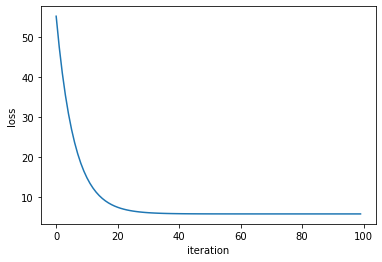

In [346]:
# plot loss
no_loop=[i for i in range(100)]
plt.plot(no_loop,loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [347]:
predict = np.dot(X,w)

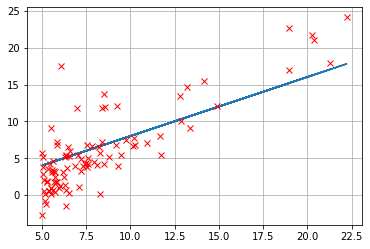

In [349]:
plt.grid()
plt.plot(X,predict)
plt.plot(X,y,'rx')

### Bias trick

y = X*w + b

In [351]:
N = data.shape[0]
print(N)

97


In [352]:
# Add column X0 = 1
X = np.hstack((np.ones((N, 1)), X))

In [353]:
X.shape

(97, 2)

In [354]:
w = np.random.randn(X.shape[1],1)
print(w)
# w = np.array([0.2,9.3]).reshape(-1,1)
# print(w.shape)

[[-0.6871727 ]
 [-0.84520564]]


In [355]:
w, loss = training(X,y,w,0.001,100)

In [356]:
print(w)

[[-0.57692053]
 [ 0.85929588]]


5.479779019870795


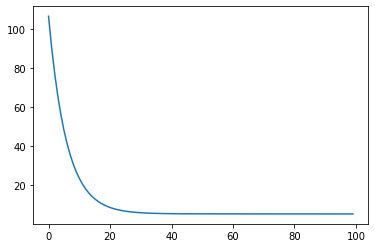

In [357]:
print(loss[-1])
plt.plot(loss)

In [358]:
predict = np.dot(X,w)

In [359]:
print(predict.shape)
print(y.shape)

(97, 1)
(97, 1)


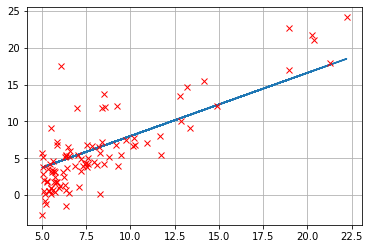

In [360]:
plt.grid()
plt.plot(X[:,1],predict)
plt.plot(X[:,1],y,'rx')

### Normalize data

In [361]:
[X_norm,muy,s]=Normalize(X)

In [362]:
X_norm.shape

(97, 2)

In [373]:
w = np.random.randn(X_norm.shape[1],1)
print(w)
# w = np.array([0.2,9.3]).reshape(-1,1)
# print(w.shape)

[[1.65980218]
 [0.74204416]]


In [374]:
w, loss = training(X_norm,y,w,0.001,1500)

In [375]:
w

array([[4.90729944],
       [3.73441221]])

5.279751994308172


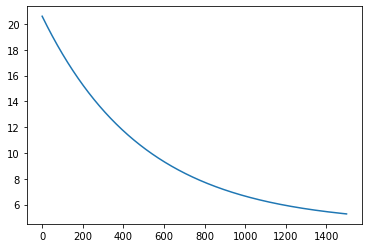

In [376]:
print(loss[-1])
plt.plot(loss)

In [377]:
predict = np.dot(X_norm,w)
# print(predict)

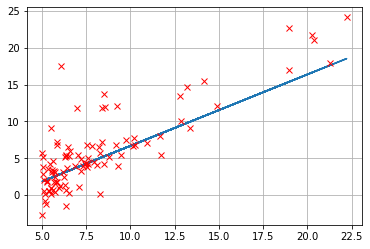

In [378]:
plt.grid()
plt.plot(X[:,1],predict)
# plt.plot(X[:,1],predict*s[1] + muy[1]) # inverse transform prediction values
plt.plot(X[:,1],y,'rx')

### Multivariate problem

In [415]:
# Load data
data=np.loadtxt('./Data/multivariate.txt',delimiter=',')

In [416]:
data.shape

(47, 3)

In [417]:
X = data[:,0:2]
y = data[:,2].reshape(-1,1)

In [418]:
print(X.shape)
print(y.shape)

(47, 2)
(47, 1)


### Normal Equation

[[  140.86108621]
 [16978.19105904]]


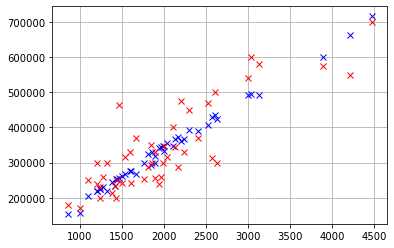

In [422]:
# w = (X.T @ X)^-1 @ (X.T @ y)
w = np.linalg.pinv(X.T @ X) @ (X.T @ y)
print(w)
predict = np.dot(X,w)
plt.grid()
plt.plot(X[:,0],predict,'bx')
plt.plot(X[:,0],y,'rx')

In [457]:
w = np.random.randn(X.shape[1],1)
print(w)

[[1.13162939]
 [1.51981682]]


In [458]:
w, loss = training(X,y,w,0.00000001,100)

In [459]:
w

array([[163.93239467],
       [  1.77154996]])

2402682358.6890798


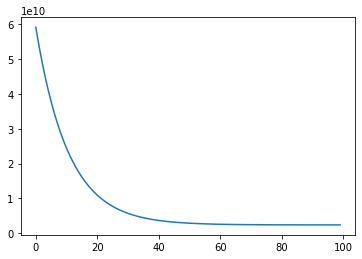

In [460]:
print(loss[-1])
plt.plot(loss)

In [461]:
predict = np.dot(X,w)
# print(predict)

In [462]:
predict

array([[344919.07304326],
       [262297.14612774],
       [393443.06186667],
       [232131.81395782],
       [491804.27022082],
       [325412.88962706],
       [251477.60807928],
       [233936.84184919],
       [226232.01929953],
       [244920.31229233],
       [318035.93186674],
       [327870.1039972 ],
       [309837.5405831 ],
       [734098.12109846],
       [207871.59109608],
       [377051.59394926],
       [216394.30406915],
       [202625.75446652],
       [427706.70390342],
       [496886.17445571],
       [289673.85603824],
       [309507.90424379],
       [262952.87570643],
       [321642.44454956],
       [637702.32993043],
       [180330.94879091],
       [239018.74608408],
       [414098.54359555],
       [360656.58293194],
       [432295.03940433],
       [301475.21690478],
       [163934.16622362],
       [334429.17133411],
       [514261.23674116],
       [296888.65295384],
       [235576.16579593],
       [203117.55165054],
       [349510.95164408],
       [6909

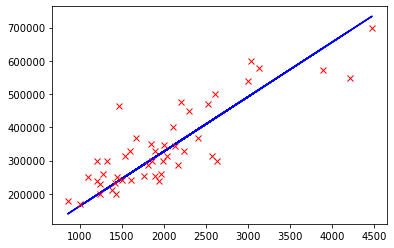

In [463]:
plt.plot(X[:,0],predict,'b')
plt.plot(X[:,0],y,'rx')

In [405]:
N = data.shape[0]
print(N)
# Add column X0 = 1
X = np.hstack((np.ones((N, 1)), X))

47


In [406]:
X.shape

(47, 3)

In [407]:
w = np.random.randn(X.shape[1],1)
print(w)

[[2.10025514]
 [0.12015895]
 [0.61720311]]


In [408]:
w, loss = training(X,y,w,0.0000001,200)

In [409]:
w

array([[  2.36246844],
       [165.38048553],
       [  1.18779288]])

2397823489.253363


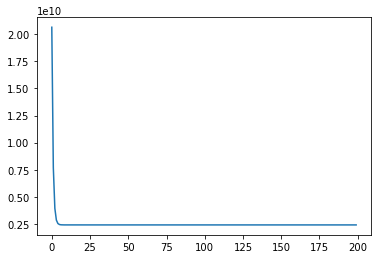

In [410]:
print(loss[-1])
plt.plot(loss)

In [411]:
predict = np.dot(X,w)

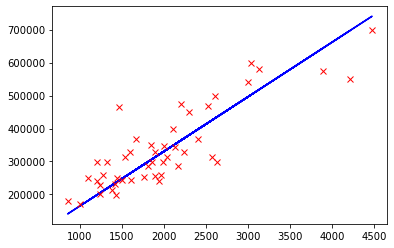

In [412]:
plt.plot(X[:,1],predict,'b')
# plt.plot(X[:,1],predict*s[1] + muy[1]) # inverse transform prediction values
plt.plot(X[:,1],y,'rx')

In [248]:
[X_norm,muy,s]=Normalize(X)

In [289]:
X_norm.shape
print(s)
print(muy)

[1.42861844e+01 7.86202619e+02 7.52842809e-01]
[   3.10638298 2000.68085106    3.17021277]


In [311]:
w = np.random.randn(X_norm.shape[1],1)
# w = w.reshape(-1,1)
print(w)

[[-0.12289023]
 [-0.93576943]
 [-0.26788808]]


In [312]:
w, loss = training(X_norm,y,w,0.001,2500)

In [313]:
w

array([[ 3.38130431e+05],
       [ 1.03006181e+05],
       [-1.78385599e+02]])

4128052106.741681


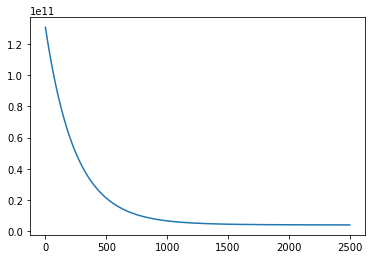

In [314]:
print(loss[-1])
plt.plot(loss)

In [315]:
predict = np.dot(X_norm,w)
print(predict)

[[351707.36393144]
 [285674.62092966]
 [390488.49871026]
 [261804.37837048]
 [468861.95771535]
 [335879.35028123]
 [277027.47601277]
 [263008.61985961]
 [256850.80454   ]
 [271786.78212374]
 [329983.56965607]
 [338081.55981996]
 [323669.65162513]
 [662268.64758465]
 [242176.86165072]
 [377149.81465733]
 [249226.71303681]
 [237984.30653949]
 [417634.17495009]
 [472923.49547935]
 [307554.51791636]
 [323644.56626103]
 [286198.69031857]
 [332865.95129503]
 [585704.34607661]
 [220165.94731679]
 [267070.15762361]
 [406996.6844607 ]
 [364285.02926511]
 [421539.61000276]
 [317224.71624696]
 [207538.11125492]
 [343085.30437864]
 [487048.28361563]
 [313082.33186395]
 [264318.79333187]
 [238377.35858117]
 [355138.90032341]
 [628048.03459463]
 [359069.42074018]
 [294296.68048246]
 [369263.68845969]
 [412131.44636661]
 [233267.68203937]
 [187910.59453516]
 [318454.0431002 ]
 [233660.73408104]]


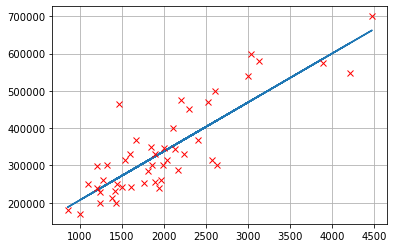

In [318]:
plt.grid()
plt.plot(X[:,1],predict)
plt.plot(X[:,1],y,'rx')
plt.show()
# plt.plot(X,predict)
# plt.plot(X,y)
# plt.plot(X[:,1],predict*s[1] + muy[1]) # inverse transform prediction values
